In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import seaborn as sns 
from matplotlib.pyplot import figure
from datetime import datetime
sns.set() 

In [2]:
data = pd.read_csv('global-average-temperature.csv')

In [3]:
data

,cartodb_id,the_geom,the_geom_webmercator,Average_value,value_type,Unnamed: 5,Year
0,2,NaN,NaN,-0.13,five_year_mean,NaN,1850
1,3,NaN,NaN,-0.12,annual_mean,NaN,1851
2,4,NaN,NaN,-0.16,five_year_mean,NaN,1852
3,5,NaN,NaN,-0.10,annual_mean,NaN,1853
4,6,NaN,NaN,-0.19,five_year_mean,NaN,1854
...,...,...,...,...,...,...,...
130,132,NaN,NaN,0.06,five_year_mean,NaN,1980
131,133,NaN,NaN,-0.04,annual_mean,NaN,1981
132,134,NaN,NaN,0.02,five_year_mean,NaN,1982
133,135,NaN,NaN,-0.05,annual_mean,NaN,1983


In [4]:
data.describe()

,cartodb_id,the_geom,the_geom_webmercator,Average_value,Unnamed: 5,Year
count,135.000000,0.0,0.0,135.000000,0.0,135.000000
mean,69.000000,NaN,NaN,-0.201852,NaN,1917.000000
std,39.115214,NaN,NaN,0.139172,NaN,39.115214
min,2.000000,NaN,NaN,-0.470000,NaN,1850.000000
25%,35.500000,NaN,NaN,-0.280000,NaN,1883.500000
50%,69.000000,NaN,NaN,-0.220000,NaN,1917.000000
75%,102.500000,NaN,NaN,-0.145000,NaN,1950.500000
max,136.000000,NaN,NaN,0.250000,NaN,1984.000000


In [5]:
y = data['Average_value']
x1 = data['Year']

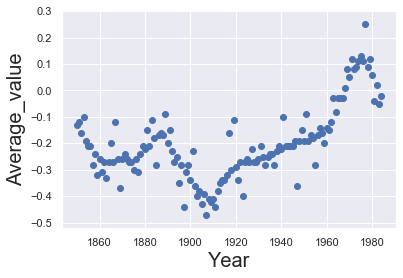

In [6]:
plt.scatter(x1,y)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Average_value',fontsize=20)
plt.show()

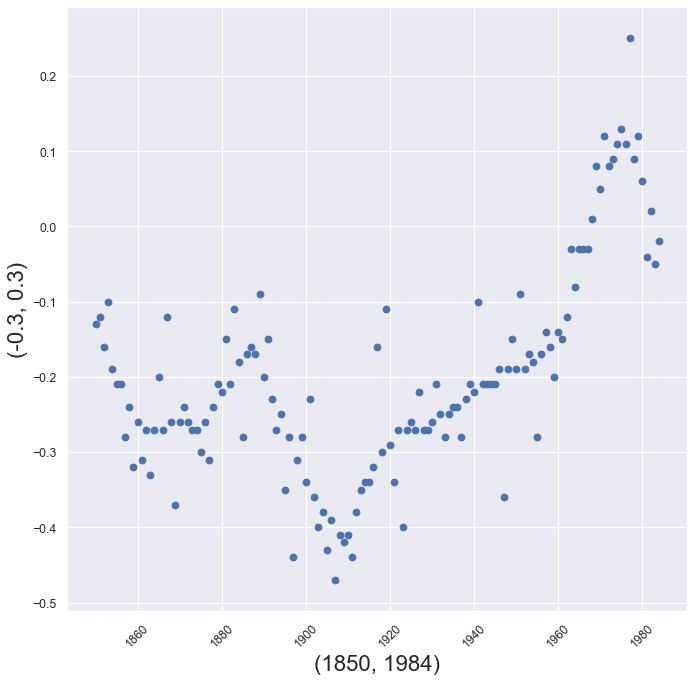

In [7]:
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(x1,y)
plt.xlabel((1850,1984),fontsize=20)
plt.ylabel((-0.3,0.3),fontsize=20)
# Rotate the labels so you can read them
plt.xticks(rotation = 45)
plt.show()

In [8]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
from datetime import date
results.summary()

D:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Average_value   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     57.82
Date:                Fri, 17 Jan 2020   Prob (F-statistic):           4.64e-12
Time:                        17:52:26   Log-Likelihood:                 99.535
No. Observations:                 135   AIC:                            -195.1
Df Residuals:                     133   BIC:                            -189.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.9563      0.494     -8.011      0.000      -4.933      -2.979
Year           0.0020      0.000      7.604      0.000       0.001       0.002
==============================================================================
Omnibus:                        1.690   Durbin-Watson:                   0.400
Prob(Omnibus):                  0.430   Jarque-Bera (JB):                1.663
Skew:                           0.191   Prob(JB):                        0.435
Kurtosis:                       2.613   Cond. No.                     9.43e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

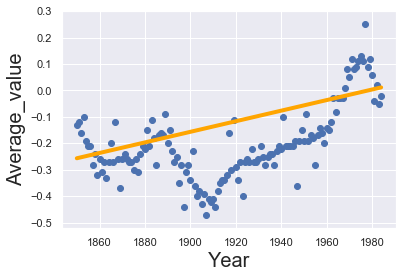

In [10]:
plt.scatter(x1,y)
yhat = 0.0020*x1 + -3.9563
fig = plt.plot(x1,yhat, lw=4, c='orange',label='regression line')
plt.xlabel('Year',fontsize=20)
plt.ylabel('Average_value',fontsize=20)
plt.show() 